In [1]:
%ls

dev-0.ipynb  dev-1.ipynb  tables-0.html


In [4]:
import lxml
import lxml.html
import lxml.etree
import os


folder = os.path.abspath('.')
filename = 'tables-0.html'
filepath = os.path.join(folder, filename)

with open(filepath, 'r') as file:
    doc = lxml.html.fromstring(
        lxml.etree.tostring(
            lxml.html.parse(file), method='html'
        )
    )

In [5]:
def open_doc(folder, filename):
    folder = os.path.abspath(folder)
    filepath = os.path.join(folder, filename)

    with open(filepath, 'r') as file:
        doc = lxml.html.fromstring(
            lxml.etree.tostring(
                lxml.html.parse(file), method='html'
            )
        )
    return doc

In [6]:
folder = os.path.abspath('.')
filename = 'tables-0.html'
doc = open_doc(folder, filename)
body = doc.body

In [10]:
from collections import defaultdict
from graphviz import Digraph


def body_to_dot_sequential_name(body):
    graph = Digraph(name='body')
    tag_counts = defaultdict(int)
    def add_node(html_node):
        tag = html_node.tag
        tag_sequential = tag_counts[tag]
        tag_counts[tag] += 1
        node_name = "{}-{}".format(tag, tag_sequential)
        graph.node(node_name, node_name)
        for child in html_node.iterchildren():
            child_name = add_node(child)
            graph.edge(node_name, child_name)
        return node_name
    add_node(body)
    return graph

In [63]:
from collections import defaultdict
from graphviz import Digraph


def body_to_dot_hierarchical_name(body):
    graph = Digraph(name='body')
    def add_node(html_node, parent_suffix, brotherhood_index):
        tag = html_node.tag
        if parent_suffix is None and brotherhood_index is None:
            node_suffix = ""
            node_name = tag
        else:
            node_suffix = "-".join([parent_suffix, str(brotherhood_index)]) if parent_suffix else str(brotherhood_index)
            node_name = "{}-{}".format(tag, node_suffix)
        graph.node(node_name, node_name, path=node_suffix)
        for child_index, child in enumerate(html_node.iterchildren()):
            child_name = add_node(child, node_suffix, child_index)
            graph.edge(node_name, child_name)
        return node_name
    add_node(body, None, None)
    return graph

In [65]:
HIERARCHICAL = 'hierarchical'
SEQUENTIAL = 'sequential'

def body_to_dot(body, name_option='hierarchical'):
    if name_option == SEQUENTIAL:
        return body_to_dot_sequential_name(body)
    elif name_option == HIERARCHICAL:
        return body_to_dot_hierarchical_name(body)
    else:
        raise Exception('No name option `{}`'.format(name_option))

In [73]:
dot = body_to_dot(body)

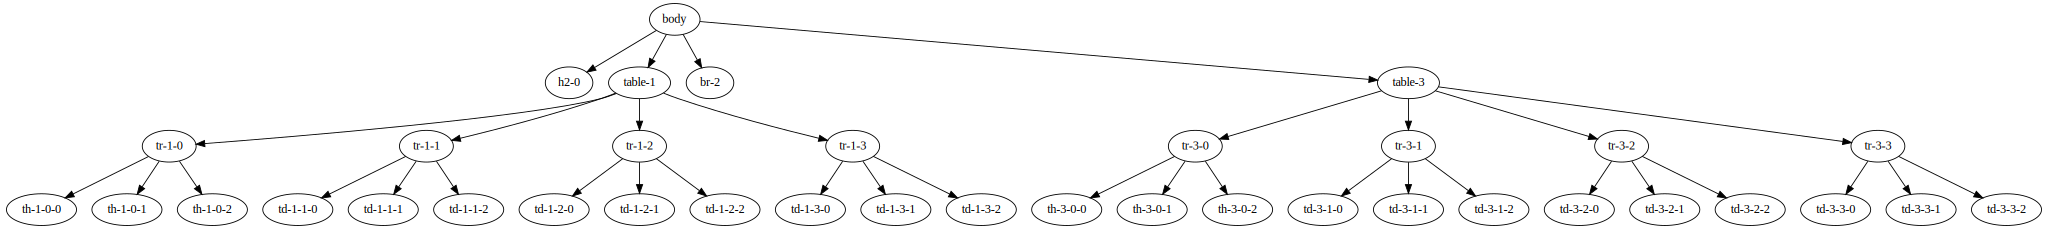

In [74]:
dot